# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [419]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)  
lng_range = (-180, 180)  

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)  
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid="
api_url = base_url + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = api_url.format(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        res = requests.get(city_url)
        data = res.json()
        
        # Parse out the city name
        city_weather = data['name']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | araria
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | nicoya
Processing Record 6 of Set 1 | moyynkum
Processing Record 7 of Set 1 | negotino
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | berezovyy
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | kalmunai
Processing Record 13 of Set 1 | lensk
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | kulia village
City not found. Skipping...
Processing Record 19 of Set 1 | maputo
Processing Record 20 of Set 1 | playa blanca
Processing Record 21 of Set 1 | muriti
Processing Record 22 of Set 1 | iskateley
P

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,16.01,77,86,3.13,NZ,1738796831
1,araria,26.1500,87.5167,15.25,57,0,1.45,IN,1738796825
2,avarua,-21.2078,-159.7750,29.03,79,100,3.60,CK,1738796834
3,bethel,41.3712,-73.4140,-1.91,48,0,2.06,US,1738796837
4,nicoya,10.1483,-85.4520,28.99,56,66,4.30,CR,1738796683


In [553]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,16.01,77,86,3.13,NZ,1738796831
1,araria,26.1500,87.5167,15.25,57,0,1.45,IN,1738796825
2,avarua,-21.2078,-159.7750,29.03,79,100,3.60,CK,1738796834
3,bethel,41.3712,-73.4140,-1.91,48,0,2.06,US,1738796837
4,nicoya,10.1483,-85.4520,28.99,56,66,4.30,CR,1738796683


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

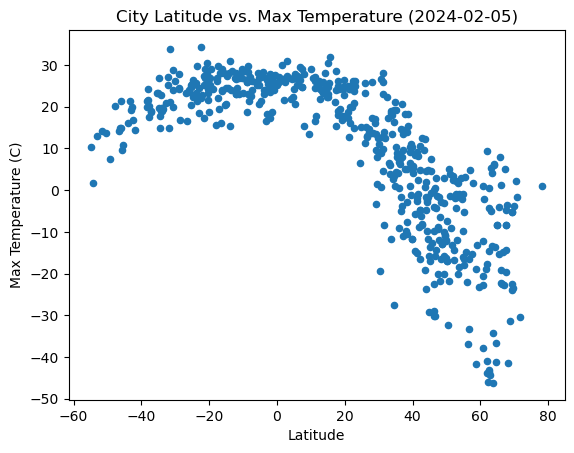

In [555]:
# Build scatter plot for latitude vs. temperature
scatter_1 = city_data_df.plot(kind="scatter", y="Max Temp", x="Lat", title=("City Latitude vs. Max Temperature (2024-02-05)"))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (C)")
                           
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

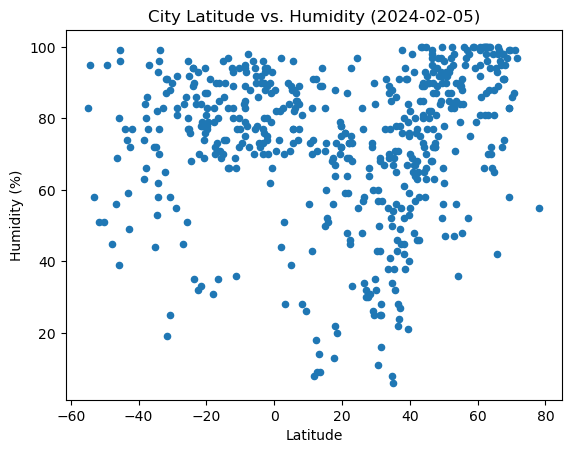

In [557]:
# Build the scatter plots for latitude vs. humidity
scatter_2 = city_data_df.plot(kind="scatter", y="Humidity", x="Lat", title=("City Latitude vs. Humidity (2024-02-05)"))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

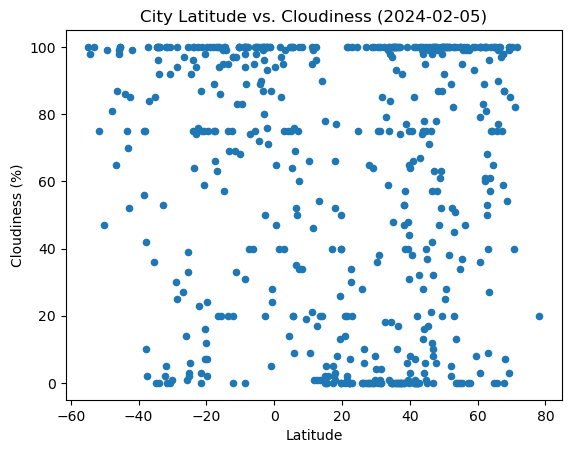

In [559]:
# Build the scatter plots for latitude vs. cloudiness
scatter_3 = city_data_df.plot(kind="scatter", y="Cloudiness", x="Lat", title=("City Latitude vs. Cloudiness (2024-02-05)"))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

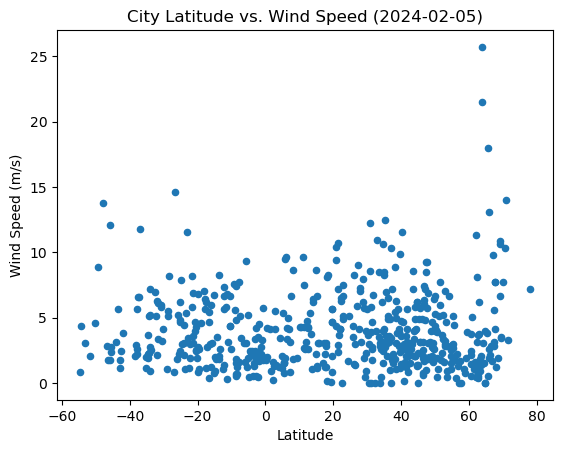

In [561]:
# Build the scatter plots for latitude vs. wind speed
scatter_4 = city_data_df.plot(kind="scatter", y="Wind Speed", x="Lat", title=("City Latitude vs. Wind Speed (2024-02-05)"))

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [543]:
# Define a function to create Linear Regression plots

def linear(df, col_name):
    
    x = df["Lat"]
    y = df[col_name]
    correlation = st.pearsonr(df["Lat"], df[col_name])
    r_score = round(correlation[0],20) ** 2
    print(f"The r^2 value is: {round(r_score,20)}")

    # Linear regression model
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
    plt.title("Latitude vs " + col_name)
    plt.xlabel("Latitude")
    plt.ylabel(col_name)
    plt.show()

In [159]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,araria,26.1500,87.5167,15.25,57,0,1.45,IN,1738796825
3,bethel,41.3712,-73.4140,-1.91,48,0,2.06,US,1738796837
4,nicoya,10.1483,-85.4520,28.99,56,66,4.30,CR,1738796683
5,moyynkum,44.2914,72.9469,-9.84,89,78,4.05,KZ,1738796840
6,negotino,41.4839,22.0892,2.37,57,7,1.22,MK,1738796842


In [153]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,16.01,77,86,3.13,NZ,1738796831
2,avarua,-21.2078,-159.7750,29.03,79,100,3.60,CK,1738796834
7,port-aux-francais,-49.3500,70.2167,7.39,95,99,8.84,TF,1738796654
9,port alfred,-33.5906,26.8910,19.54,99,100,2.52,ZA,1738796847
10,atafu village,-8.5421,-172.5159,28.36,75,31,7.42,TK,1738796848


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6397370091319586


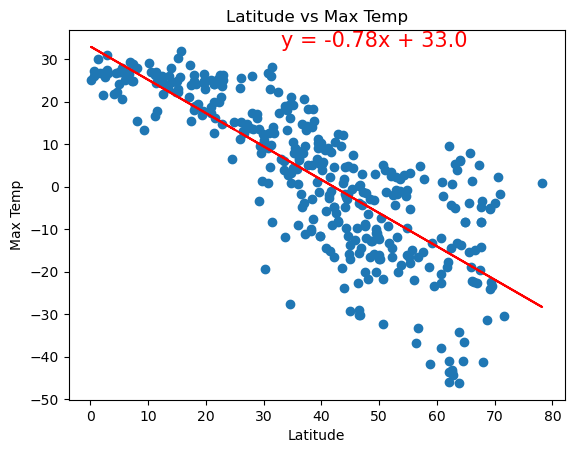

In [441]:
# Linear regression on Northern Hemisphere
linear(northern_hemi_df, "Max Temp")

The r^2 value is: 0.32575062145390477


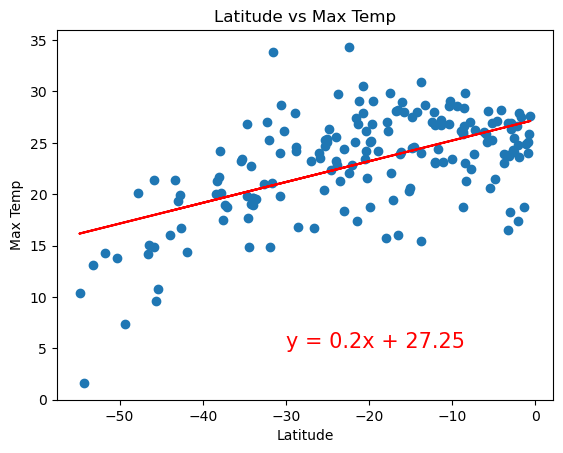

In [473]:
# Linear regression on Southern Hemisphere
linear(southern_hemi_df, "Max Temp")

**Discussion about the linear relationship:** There is a very positive correlation between latitude and max temperature demonstrated by our models. Both the northern and southern hemispher models exhibited high r^2 values, pointing to a good fit for our lin regression model, and lower variance than the other models. The correlation backs up what common sense would tell us (the closer you are to the equator the warmer it is). This is seen in both graphs as the temperature is negatively correlated to latitude in the northern hemisphere (meaning the higher the latitude the lower the temp), and it is the opposite in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.13419690025954586


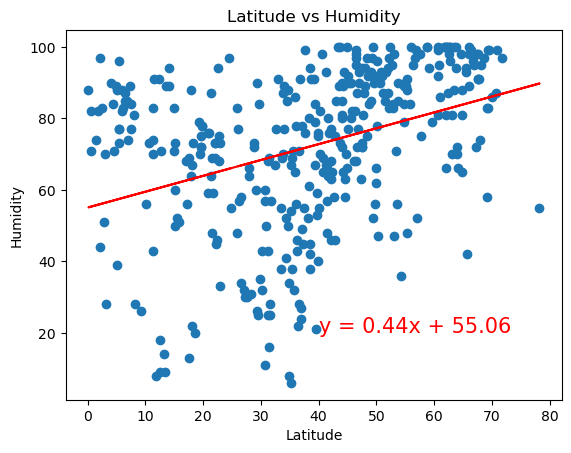

In [495]:
# Northern Hemisphere
linear(northern_hemi_df, "Humidity")

The r^2 value is: 0.05875231399135968


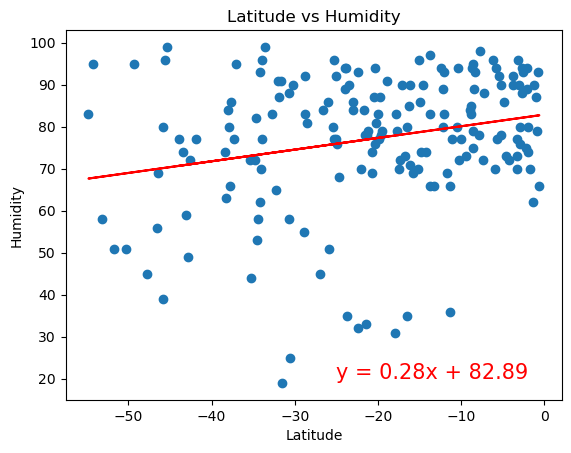

In [509]:
# Southern Hemisphere
linear(southern_hemi_df, "Humidity")

**Discussion about the linear relationship:** According to the data we have there appears to be a slight correlation between humidity and latitude. While both r^2 values are on the lower end, they are both above 0.05 meaning that our at least 5% of our data fits within the regression model. Also despite not having a higher r^2 score the positive slopes from both models confirms this precieved trend in the data. That is it appears there is some positive correlation between humidity and latitude in this case.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.042761040706019875


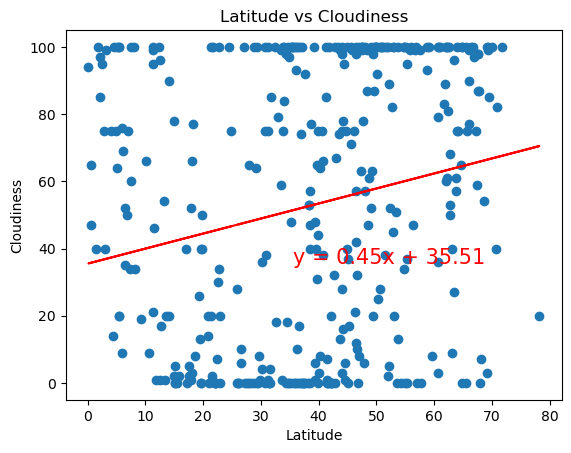

In [449]:
# Northern Hemisphere
linear(northern_hemi_df, "Cloudiness")

The r^2 value is: 0.006393112305785642


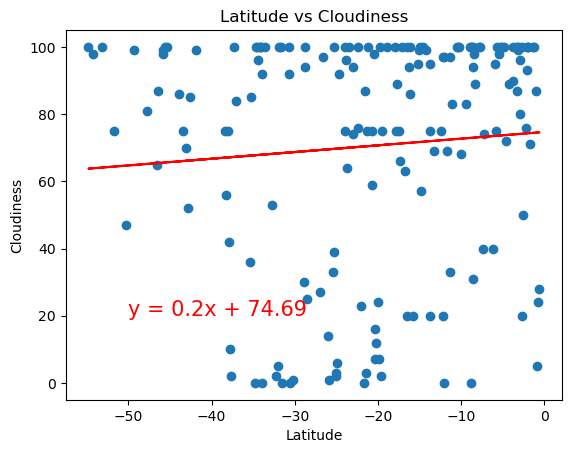

In [523]:
# Southern Hemisphere
linear(southern_hemi_df, "Cloudiness")

**Discussion about the linear relationship:** While the linear models seem to suggest a positive correlation between cloudiness and latitude in both hemispheres we can see that the data contains many outliers on each end. This is backed up by the low r^2 values from both models which suggests that there is not a statistically relevent correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0027199169389383005


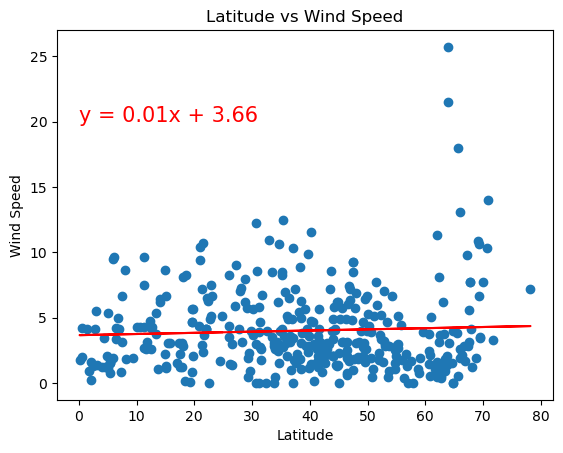

In [529]:
# Northern Hemisphere
linear(northern_hemi_df, "Wind Speed")

The r^2 value is: 0.03613211681376955


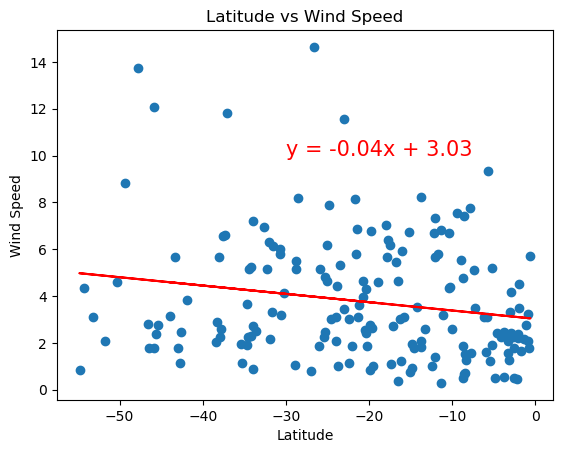

In [545]:
# Southern Hemisphere
linear(southern_hemi_df, "Wind Speed")

**Discussion about the linear relationship:** In general it appears that the correlation between wind speed and latitudes is a poor one. The linear regression fits the model better when looking at the southern hemisphere where the r^2 value suggests that 3 percent of the variance in wind speed is explained by our model, as opposed to less than 0.3% in the northern hemesiphere. However, this is still not a very effecient model. Regarding the overall trend that is suggested by our model the wind speed seems to correlete negatively with our latitudes in the southern hemisphere. That is to say the closer we get to the equator the slower our wind speeds get. There does not seem to be any significant correlation between wind speed and latitude in the northern hemisphere.